# Data Analysis

In this notebook, I'll try to get a better understanding of the data so I can find relationships in the various factors and Dengue.

## Load libraries

I'll load in the libraries to read data and draw visualizations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploring Iquitos, Peru

Exploratory data analysis for one of the cities, in our case, Iquitos, Peru.

## Load data

I'll start by loading in the data and looking at the first few rows.

In [2]:
dataset = pd.read_csv("data/iquitos/combined_data.csv")
dataset.head()

,date,population,TMAX,TMIN,TAVG,TDTR,PRCP(-1),PRCP(-2),PRCP,year,month,air_temperature,dew_point_temperature,relative_humidity,specific_humidity,total_cases
0,2000-07,386666,31.458333,20.325000,25.916667,11.133333,85.8,309.3,97.3,2000,7,296.38324,293.75934,87.406780,15.334194,0
1,2000-08,386666,32.864706,21.170588,27.017647,11.694118,97.3,85.8,225.2,2000,8,298.41354,293.17548,76.235160,14.762258,0
2,2000-09,386666,33.300000,20.925000,27.108333,12.375000,225.2,97.3,247.1,2000,9,299.03635,293.18500,73.200330,14.805333,1
3,2000-10,386666,33.163636,21.709091,27.436364,11.454545,247.1,225.2,81.2,2000,10,299.02484,294.70290,79.250320,16.219677,2
4,2000-11,386666,33.400000,21.550000,27.475000,11.850000,81.2,247.1,25.4,2000,11,300.68765,294.24866,71.011665,15.850667,0


## Dataframe Analysis

In this section, I'll explore dataset level factors and adjust things if needed.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   156 non-null    object 
 1   population             156 non-null    int64  
 2   TMAX                   154 non-null    float64
 3   TMIN                   154 non-null    float64
 4   TAVG                   154 non-null    float64
 5   TDTR                   154 non-null    float64
 6   PRCP(-1)               154 non-null    float64
 7   PRCP(-2)               154 non-null    float64
 8   PRCP                   154 non-null    float64
 9   year                   156 non-null    int64  
 10  month                  156 non-null    int64  
 11  air_temperature        156 non-null    float64
 12  dew_point_temperature  156 non-null    float64
 13  relative_humidity      156 non-null    float64
 14  specific_humidity      156 non-null    float64
 15  total_

The temperate columns have a couple of missing data points and thus, I'd simply replace the value with the average value of the previous and next months.

In [4]:
dataset[dataset.isnull().any(axis=1)]

,date,population,TMAX,TMIN,TAVG,TDTR,PRCP(-1),PRCP(-2),PRCP,year,month,air_temperature,dew_point_temperature,relative_humidity,specific_humidity,total_cases
95,2008-06,436185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,6,296.43900,294.61700,91.01100,16.108334,2
131,2011-06,452757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,6,295.95633,294.55032,93.08566,16.086000,14


However, after looking at the two rows, we have no data what so ever and thus it is much better if I drop these two rows completely.

In [5]:
dataset = dataset.dropna(how = 'any').reset_index()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  154 non-null    int64  
 1   date                   154 non-null    object 
 2   population             154 non-null    int64  
 3   TMAX                   154 non-null    float64
 4   TMIN                   154 non-null    float64
 5   TAVG                   154 non-null    float64
 6   TDTR                   154 non-null    float64
 7   PRCP(-1)               154 non-null    float64
 8   PRCP(-2)               154 non-null    float64
 9   PRCP                   154 non-null    float64
 10  year                   154 non-null    int64  
 11  month                  154 non-null    int64  
 12  air_temperature        154 non-null    float64
 13  dew_point_temperature  154 non-null    float64
 14  relative_humidity      154 non-null    float64
 15  specif

Perfect! There are no more null values. We can start with our exploratory data analysis.

In [6]:
dataset.describe()

,index,population,TMAX,TMIN,TAVG,TDTR,PRCP(-1),PRCP(-2),PRCP,year,month,air_temperature,dew_point_temperature,relative_humidity,specific_humidity,total_cases
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,77.038961,426292.207792,32.620067,22.167542,27.393276,10.452525,117.631818,119.196753,118.308442,2006.461039,6.506494,297.869171,295.533163,88.842268,17.144967,33.110390
std,45.241095,22335.718451,0.927325,0.715594,0.616568,1.108211,93.774068,94.949007,93.918700,3.792206,3.485257,0.937468,1.162197,6.055698,1.201831,44.781176
min,0.000000,386666.000000,30.200000,19.150000,25.700000,8.071429,5.000000,5.000000,5.000000,2000.000000,1.000000,295.531340,292.921300,71.011665,14.513333,0.000000
25%,38.250000,405988.000000,31.978788,21.671250,26.983654,9.685000,49.025000,49.025000,49.025000,2003.000000,3.250000,297.250340,294.702472,85.814354,16.231637,8.000000
50%,76.500000,424247.000000,32.603750,22.223377,27.463333,10.518651,91.350000,91.900000,91.900000,2006.000000,7.000000,297.820250,295.905580,90.355070,17.516452,21.000000
75%,115.750000,447467.000000,33.337500,22.753205,27.865625,11.151190,170.875000,176.450000,176.450000,2010.000000,9.750000,298.553182,296.447998,93.939842,18.084129,38.750000
max,155.000000,462783.000000,34.866667,23.450000,28.658333,13.150000,514.300000,514.300000,514.300000,2013.000000,12.000000,300.687650,297.675170,97.001670,19.523226,328.000000


The values vary greatly and it'll be a good step to standardize the values if any models may be developed.

I'll also drop `index`, `date`, `month` and `year` as I no longer need them.

In [7]:
dataset = dataset.drop(['index', 'date', 'year', 'month'], axis = 1)

## Exploratory Data Analysis

With a complete dataframe, let's try to do analysis on the columns and see the effect.

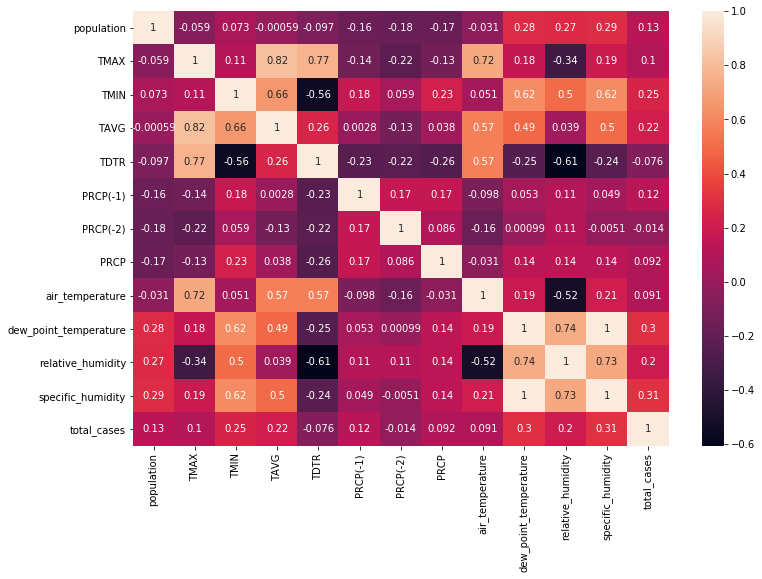

In [8]:
plt.figure(figsize = (12, 8))
sns.heatmap(dataset.corr(), annot = True)

If we observe the last column which shows the correlation of each factor with the total cases of Dengue, we observe that the correlations are not very strong. The most correlated values include **population**, **TMIN**, **TDTR**, and **air_temperature**. The correlation is not very strong between the precipitation value for the current month but is more correlate with the **last month's precipitation**.

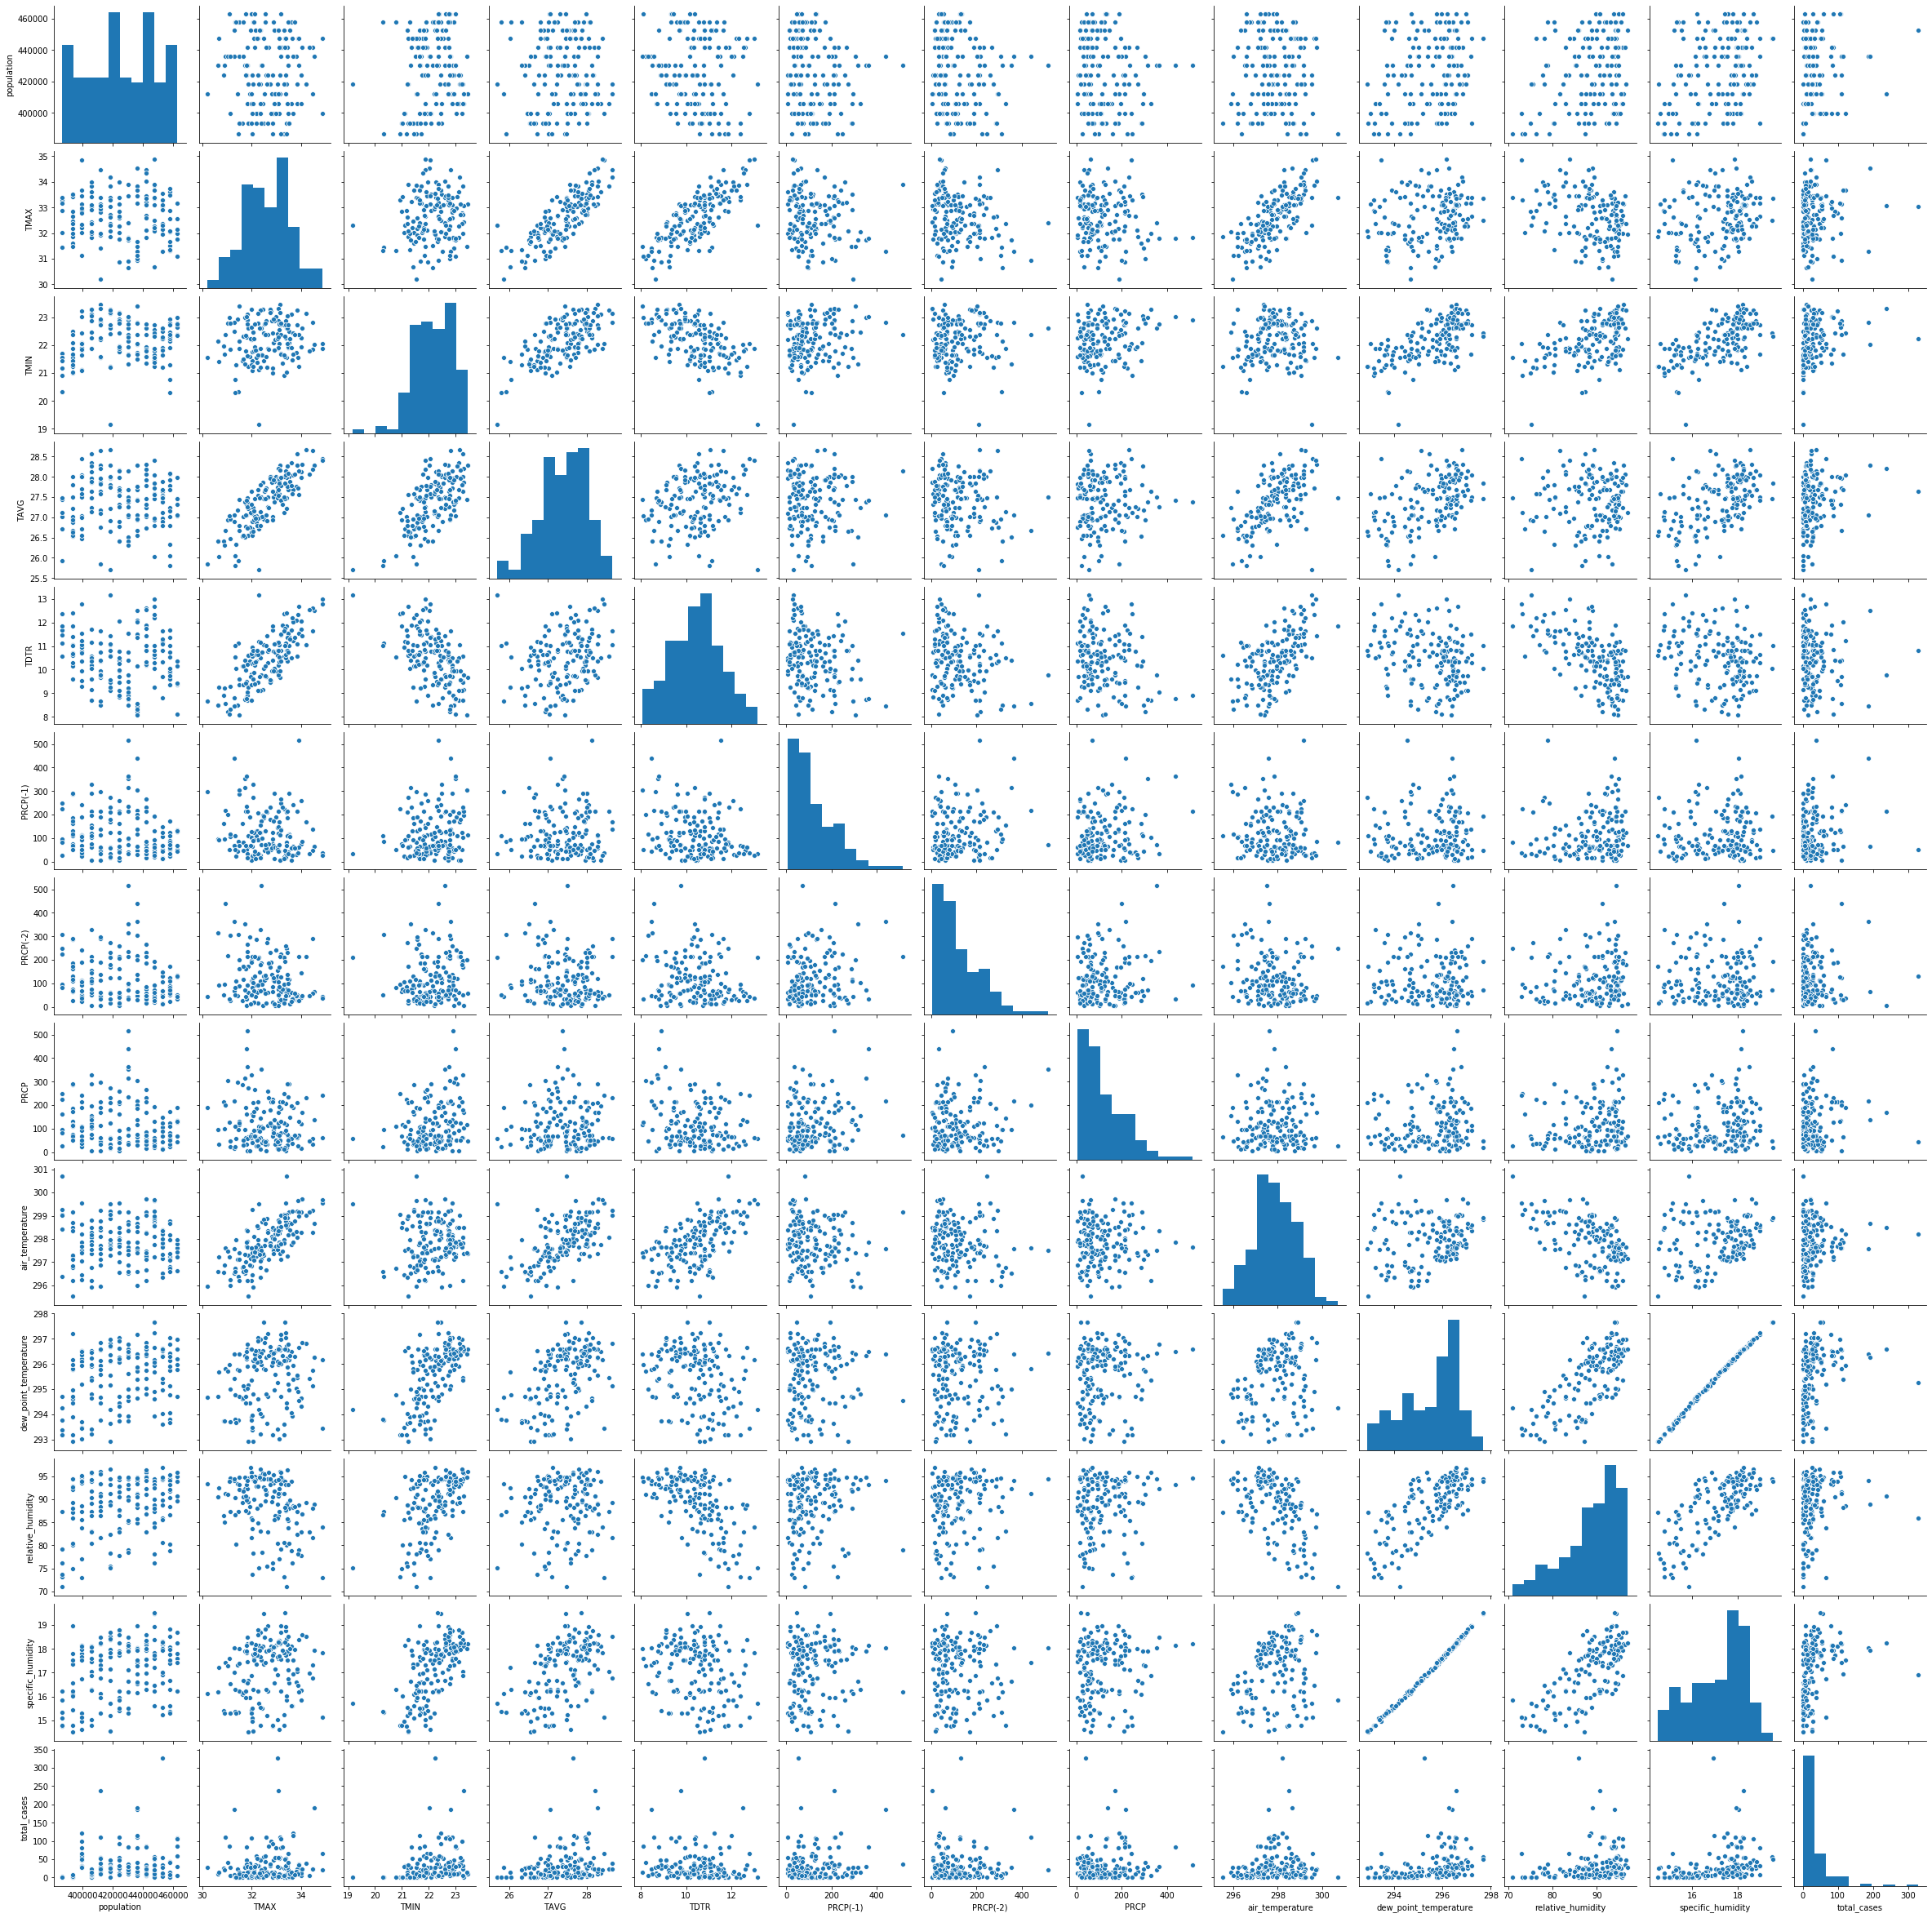

In [9]:
sns.pairplot(dataset)

The pair plots reveal the distribution of data. Precipitation values seem to be quite skewed along. Population is also not consistently growing across the year. All the remaining seem to have quite a normal distribution. The Dengue cases distribution is quite skewed.

# Comparing Iquitos, Peru with San Juan, Puerto Rico

Next, let's see how the two cities compare with one other.

## Load data

Load the data file that includes data from both the cities.

In [10]:
dataset = pd.read_csv("data/complete_data.csv")
dataset.head()

,date,population,TMAX,TMIN,TAVG,TDTR,PRCP(-1),PRCP(-2),PRCP,year,month,air_temperature,dew_point_temperature,relative_humidity,specific_humidity,total_cases,place
0,2000-07,386666.0,31.458333,20.325000,25.916667,11.133333,85.8,309.3,97.3,2000,7,296.38324,293.75934,87.406780,15.334194,0,Iquitos
1,2000-08,386666.0,32.864706,21.170588,27.017647,11.694118,97.3,85.8,225.2,2000,8,298.41354,293.17548,76.235160,14.762258,0,Iquitos
2,2000-09,386666.0,33.300000,20.925000,27.108333,12.375000,225.2,97.3,247.1,2000,9,299.03635,293.18500,73.200330,14.805333,1,Iquitos
3,2000-10,386666.0,33.163636,21.709091,27.436364,11.454545,247.1,225.2,81.2,2000,10,299.02484,294.70290,79.250320,16.219677,2,Iquitos
4,2000-11,386666.0,33.400000,21.550000,27.475000,11.850000,81.2,247.1,25.4,2000,11,300.68765,294.24866,71.011665,15.850667,0,Iquitos


## Exploring the data

Ler's compare the time based dengue cases for the two cities. As the timeline for the two is different, I'll first ensure they fall in the same date and time.

In [11]:
iquitos_data = dataset[dataset['place'] == 'Iquitos'].reset_index(drop = True)
san_juan_data = dataset[dataset['place'] == 'San Juan'].reset_index(drop = True)

In [12]:
limited_iquitos_data = iquitos_data[:-2]
limited_san_juan_data = san_juan_data[123:]

In [13]:
print("The number of Dengue cases from July, 2000 to April, 2013 are {} in Iquitos and {} in San Juan.".format(
    sum(limited_iquitos_data['total_cases']), sum(limited_san_juan_data['total_cases'])))

The number of Dengue cases from July, 2000 to April, 2013 are 5079 in Iquitos and 22697 in San Juan.


### Dengue data

This reveals that the outbreak was much severe in San Juan than in Iquitos for the given period.

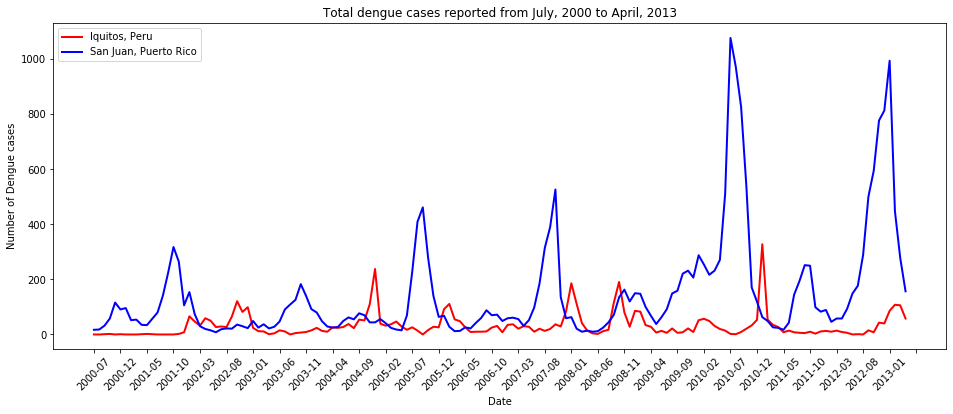

In [14]:
plt.figure(figsize = (16, 6))
plt.plot(limited_iquitos_data['date'], limited_iquitos_data['total_cases'], 
         color = 'red', linewidth = 2, label = 'Iquitos, Peru')
plt.plot(limited_san_juan_data['date'], limited_san_juan_data['total_cases'], 
         color = 'blue', linewidth = 2, label = 'San Juan, Puerto Rico')
plt.xticks(np.arange(0, 160, 5), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Number of Dengue cases")
plt.title("Total dengue cases reported from July, 2000 to April, 2013")
plt.legend()
plt.show()

We observe that the amount of Dengue cases are much higher in **San Juan** than in **Iquitos**.

### Air temperature data

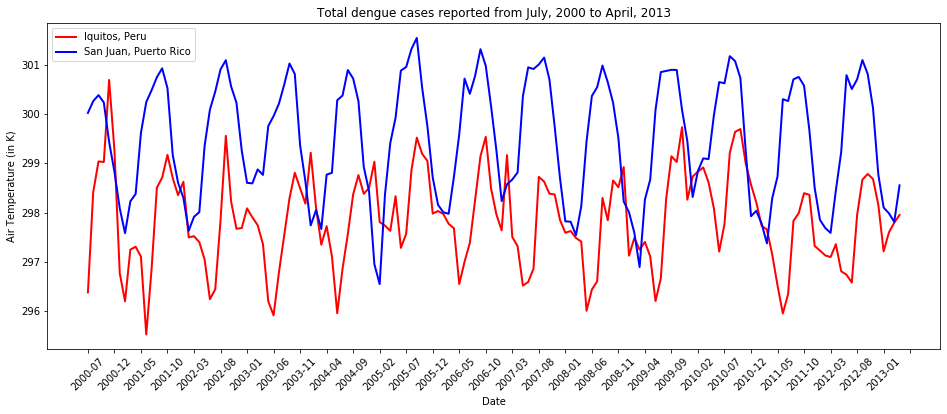

In [15]:
plt.figure(figsize = (16, 6))
plt.plot(limited_iquitos_data['date'], limited_iquitos_data['air_temperature'], 
         color = 'red', linewidth = 2, label = 'Iquitos, Peru')
plt.plot(limited_san_juan_data['date'], limited_san_juan_data['air_temperature'], 
         color = 'blue', linewidth = 2, label = 'San Juan, Puerto Rico')
plt.xticks(np.arange(0, 160, 5), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Air Temperature (in K)")
plt.title("Total dengue cases reported from July, 2000 to April, 2013")
plt.legend()
plt.show()

It seems that the air temperatures form a seasonal trend in the time series. However, the values are very varied because the two are regionally different and consitute different atmospheric and geographic factors.

## Plots per city

This section includes some plots for key features. These plots are also included in the website.

### Iquitos, Peru

Let's start by grabbing the dataset.

In [16]:
dataset = pd.read_csv("data/iquitos/combined_data.csv")
dataset.head()

,date,population,TMAX,TMIN,TAVG,TDTR,PRCP(-1),PRCP(-2),PRCP,year,month,air_temperature,dew_point_temperature,relative_humidity,specific_humidity,total_cases
0,2000-07,386666,31.458333,20.325000,25.916667,11.133333,85.8,309.3,97.3,2000,7,296.38324,293.75934,87.406780,15.334194,0
1,2000-08,386666,32.864706,21.170588,27.017647,11.694118,97.3,85.8,225.2,2000,8,298.41354,293.17548,76.235160,14.762258,0
2,2000-09,386666,33.300000,20.925000,27.108333,12.375000,225.2,97.3,247.1,2000,9,299.03635,293.18500,73.200330,14.805333,1
3,2000-10,386666,33.163636,21.709091,27.436364,11.454545,247.1,225.2,81.2,2000,10,299.02484,294.70290,79.250320,16.219677,2
4,2000-11,386666,33.400000,21.550000,27.475000,11.850000,81.2,247.1,25.4,2000,11,300.68765,294.24866,71.011665,15.850667,0


#### Population data

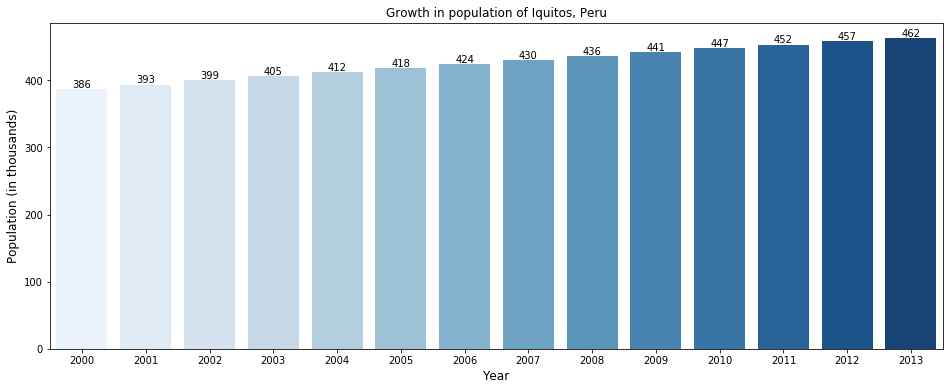

In [17]:
pop_data = dataset[['population', 'year']]
pop_data = pop_data.drop_duplicates().reset_index(drop = True)

plt.figure(figsize = (16, 6))
plot = sns.barplot(pop_data['year'], pop_data['population']/1000, palette=("Blues"))
plot.set_xlabel("Year",fontsize = 12)
plot.set_ylabel("Population (in thousands)",fontsize = 12)
for p in plot.patches:
    plot.text(p.get_x() + p.get_width()/2., p.get_height(), 
              '%d' % int(p.get_height()), fontsize = 10, 
              color = 'black', ha = 'center', va = 'bottom')
plot.set_title("Growth in population of Iquitos, Peru")
plot.get_figure().savefig("plots/iquitos_population.png")

The population seems to **consistently rise over the years**.

#### Air temperature

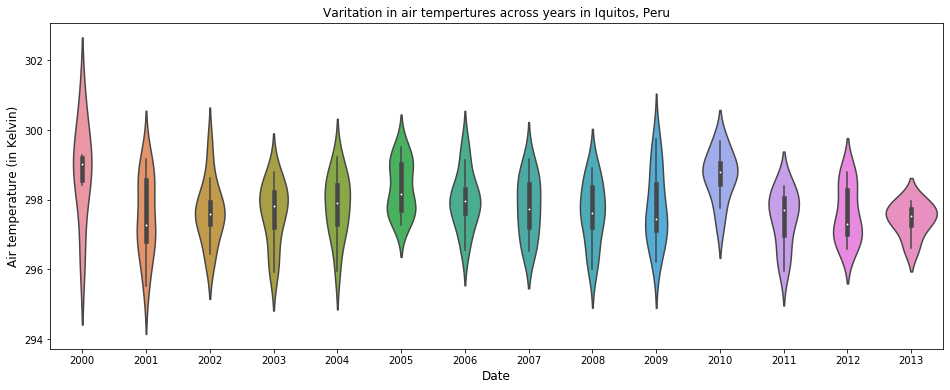

In [18]:
plt.figure(figsize = (16, 6))
plot = sns.violinplot(x = 'year', y = 'air_temperature', data = dataset)
plot.set_xlabel("Date",fontsize = 12)
plot.set_ylabel("Air temperature (in Kelvin)",fontsize = 12)
plot.set_title("Varitation in air tempertures across years in Iquitos, Peru")
plot.get_figure().savefig("plots/iquitos_air_temperature.png")

The air temperature variation is quite varied. It is the **most variable in the year 2000** but then never reaches the sam extremes ever again.

#### Surface temperature

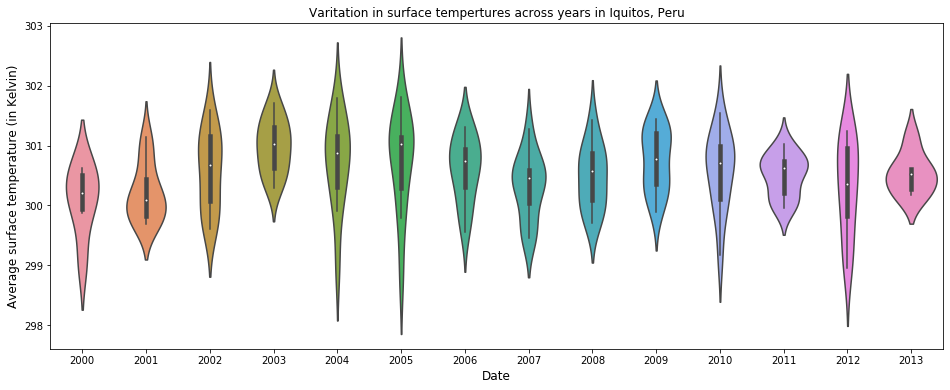

In [19]:
plt.figure(figsize = (16, 6))

temp_in_k = dataset['TAVG'] + 273.15
dataset = dataset.assign(tavg_k = temp_in_k)

plot = sns.violinplot(x = 'year', y = 'tavg_k', data = dataset)
plot.set_xlabel("Date",fontsize = 12)
plot.set_ylabel("Average surface temperature (in Kelvin)",fontsize = 12)
plot.set_title("Varitation in surface tempertures across years in Iquitos, Peru")
plot.get_figure().savefig("plots/iquitos_surf_temperature.png")

As we can see, the variation in the surface temperature is quite varied from the air temperature. **The extremes are visible in the year 2005.**

#### Precipitation data

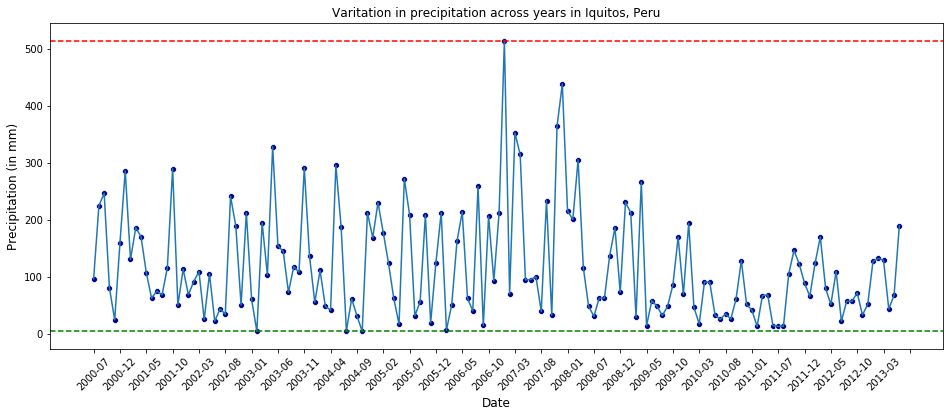

In [20]:
plt.figure(figsize = (16, 6))

plot = sns.lineplot('date', 'PRCP', data = dataset, markers=True)
sns.scatterplot(dataset['date'], dataset['PRCP'], color = 'darkblue')
plot.axhline(dataset['PRCP'].min(), c ='green', linestyle = '--')
plot.axhline(dataset['PRCP'].max(), c ='red', linestyle = '--')
plot.set_xlabel("Date",fontsize = 12)
plot.set_ylabel("Precipitation (in mm)",fontsize = 12)
plot.set_title("Varitation in precipitation across years in Iquitos, Peru")
plt.xticks(np.arange(0, 160, 5), rotation = 45)
plot.get_figure().savefig("plots/iquitos_precipitation.png")

The precipitation is **fairly consistent except at between 2006 and 2008** where it shows a deviation from the normal behavior.

#### Humidity data

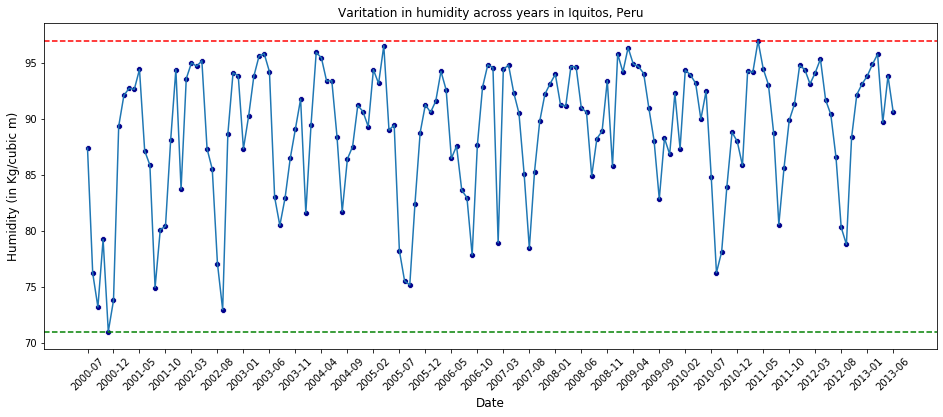

In [21]:
plt.figure(figsize = (16, 6))

plot = sns.lineplot('date', 'relative_humidity', data = dataset, markers=True)
sns.scatterplot(dataset['date'], dataset['relative_humidity'], color = 'darkblue')
plot.axhline(dataset['relative_humidity'].min(), c ='green', linestyle = '--')
plot.axhline(dataset['relative_humidity'].max(), c ='red', linestyle = '--')
plot.set_xlabel("Date",fontsize = 12)
plot.set_ylabel("Humidity (in Kg/cubic m)",fontsize = 12)
plot.set_title("Varitation in humidity across years in Iquitos, Peru")
plt.xticks(np.arange(0, 160, 5), rotation = 45)
plot.get_figure().savefig("plots/iquitos_humidity.png")

The **relative humidity is consistent across years bur varies quite a lot within a year**, probably due to seasonal effect.

### San Juan, Puerto Rico

Let's start by grabbing the dataset.

In [22]:
dataset = pd.read_csv("data/san_juan/combined_data.csv")
dataset.head()

,date,population,TMAX,TMIN,TAVG,TDTR,PRCP(-1),PRCP(-2),PRCP,year,month,air_temperature,dew_point_temperature,relative_humidity,specific_humidity,total_cases
0,1990-04,2217968.0,29.966667,22.356667,26.166667,7.610000,79.9,76.8,26.8,1990,4,297.94968,293.25900,75.476670,14.753333,4
1,1990-05,2217968.0,31.245161,23.958065,27.583871,7.287097,26.8,79.9,61.8,1990,5,299.02194,295.21033,79.740326,16.603226,18
2,1990-06,2217968.0,31.450000,24.513333,27.986667,6.936667,61.8,26.8,109.8,1990,6,299.52032,296.23334,82.286000,17.636667,21
3,1990-07,2217968.0,31.703226,24.441935,28.077419,7.261290,109.8,61.8,146.4,1990,7,299.71710,296.18420,81.199036,17.582580,39
4,1990-08,2217968.0,31.767742,24.777419,28.277419,6.990323,146.4,109.8,86.9,1990,8,300.27032,296.71063,81.166770,18.167420,85


Population data for San Juan is available for 1990 and then from 1999 to 2013. To make it consistent with the rest Iquitos data, I'll start from `2000` and keep data till `2013`.

In [23]:
dataset = dataset[dataset['year'] >= 2000]
dataset = dataset[6:].reset_index(drop = True)
dataset.head()

,date,population,TMAX,TMIN,TAVG,TDTR,PRCP(-1),PRCP(-2),PRCP,year,month,air_temperature,dew_point_temperature,relative_humidity,specific_humidity,total_cases
0,2000-07,2389397.0,31.467742,25.038710,28.264516,6.429032,75.7,119.9,93.3,2000,7,300.02000,296.06805,79.109680,17.457096,17
1,2000-08,2389397.0,31.464516,24.951613,28.216129,6.512903,93.3,75.7,242.0,2000,8,300.25870,296.68290,80.986770,18.140322,18
2,2000-09,2389397.0,30.986667,24.563333,27.770000,6.423333,242.0,93.3,75.3,2000,9,300.38000,296.75100,80.691000,18.250000,32
3,2000-10,2389397.0,31.083871,24.251613,27.658065,6.832258,75.3,242.0,94.7,2000,10,300.23130,296.10483,78.276450,17.538387,58
4,2000-11,2389397.0,29.376667,23.306667,26.326667,6.070000,94.7,75.3,95.8,2000,11,299.43167,294.32233,73.789665,15.788000,116


#### Population data

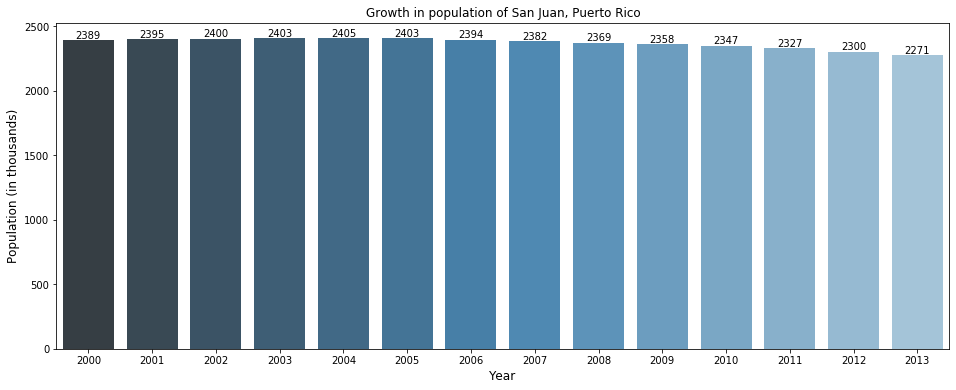

In [24]:
pop_data = dataset[['population', 'year']]
pop_data = pop_data.drop_duplicates().reset_index(drop = True)

plt.figure(figsize = (16, 6))
plot = sns.barplot(pop_data['year'], pop_data['population']/1000, palette=("Blues_d"))
plot.set_xlabel("Year",fontsize = 12)
plot.set_ylabel("Population (in thousands)",fontsize = 12)
for p in plot.patches:
    plot.text(p.get_x() + p.get_width()/2., p.get_height(), 
              '%d' % int(p.get_height()), fontsize = 10, 
              color = 'black', ha = 'center', va = 'bottom')
plot.set_title("Growth in population of San Juan, Puerto Rico")
plot.get_figure().savefig("plots/san_juan_population.png")

Over the years, the **population has actually decreased** which is in complete contrast to what we saw in Iquitos where the population rose almost linearly with age.

#### Air temperature

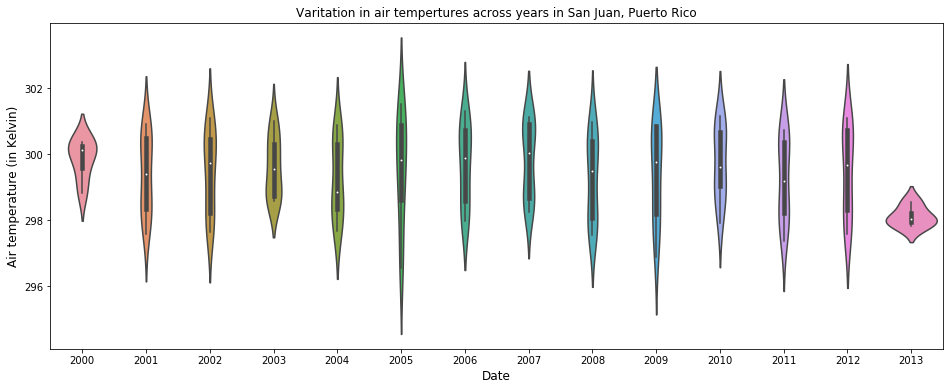

In [25]:
plt.figure(figsize = (16, 6))
plot = sns.violinplot(x = 'year', y = 'air_temperature', data = dataset)
plot.set_xlabel("Date",fontsize = 12)
plot.set_ylabel("Air temperature (in Kelvin)",fontsize = 12)
plot.set_title("Varitation in air tempertures across years in San Juan, Puerto Rico")
plot.get_figure().savefig("plots/san_juan_air_temperature.png")

Except for the year 2000 and 2013, we see that the **violin plots are very slim**. This is again in contrast to what we saw in Iquitos. The variation in the years 2000 and 2013 can be attributed to that fact that they have data for only a few months of the year and thus, the data are a little skewed based on what months are in the data.

#### Surface temperature

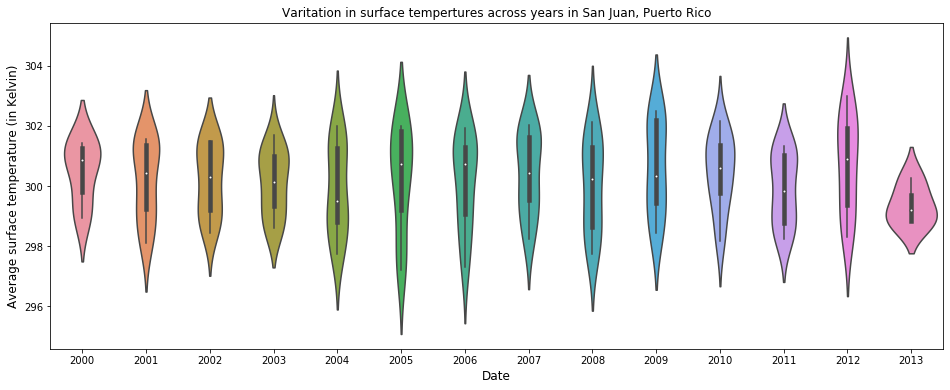

In [26]:
plt.figure(figsize = (16, 6))

temp_in_k = dataset['TAVG'] + 273.15
dataset = dataset.assign(tavg_k = temp_in_k)

plot = sns.violinplot(x = 'year', y = 'tavg_k', data = dataset)
plot.set_xlabel("Date",fontsize = 12)
plot.set_ylabel("Average surface temperature (in Kelvin)",fontsize = 12)
plot.set_title("Varitation in surface tempertures across years in San Juan, Puerto Rico")
plot.get_figure().savefig("plots/san_juan_surf_temperature.png")

The data seems quite **consistent across the years**.

#### Precipitation data

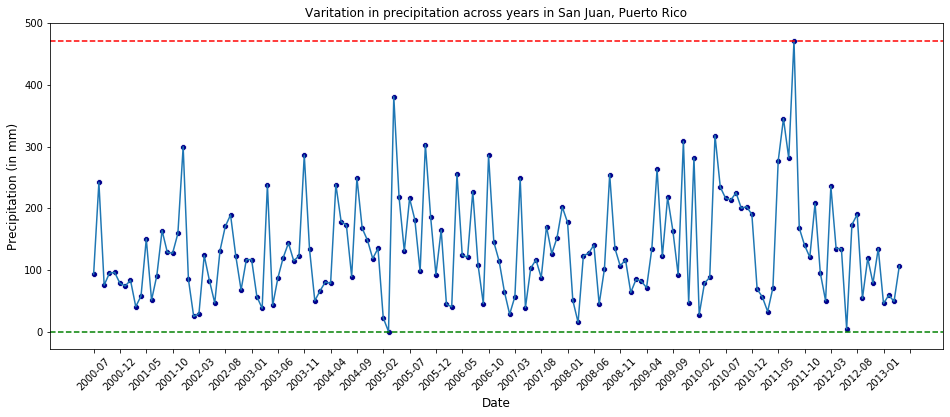

In [27]:
plt.figure(figsize = (16, 6))

plot = sns.lineplot('date', 'PRCP', data = dataset, markers=True)
sns.scatterplot(dataset['date'], dataset['PRCP'], color = 'darkblue')
plot.axhline(dataset['PRCP'].min(), c ='green', linestyle = '--')
plot.axhline(dataset['PRCP'].max(), c ='red', linestyle = '--')
plot.set_xlabel("Date",fontsize = 12)
plot.set_ylabel("Precipitation (in mm)",fontsize = 12)
plot.set_title("Varitation in precipitation across years in San Juan, Puerto Rico")
plt.xticks(np.arange(0, 160, 5), rotation = 45)
plot.get_figure().savefig("plots/san_juan_precipitation.png")

The precipitation values are **similar to the data from Iquitos** just across various months. Here the peak does not touch 500 but it was higher than 500 for Iquitos.

#### Humidity data

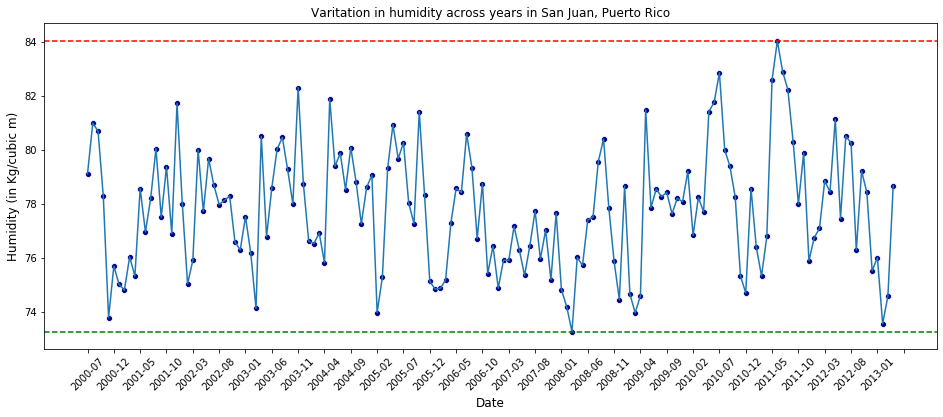

In [28]:
plt.figure(figsize = (16, 6))

plot = sns.lineplot('date', 'relative_humidity', data = dataset, markers=True)
sns.scatterplot(dataset['date'], dataset['relative_humidity'], color = 'darkblue')
plot.axhline(dataset['relative_humidity'].min(), c ='green', linestyle = '--')
plot.axhline(dataset['relative_humidity'].max(), c ='red', linestyle = '--')
plot.set_xlabel("Date",fontsize = 12)
plot.set_ylabel("Humidity (in Kg/cubic m)",fontsize = 12)
plot.set_title("Varitation in humidity across years in San Juan, Puerto Rico")
plt.xticks(np.arange(0, 160, 5), rotation = 45)
plot.get_figure().savefig("plots/san_juan_humidity.png")

Across years, sometimes it stays low across years such as between 2005 and 2008, while in other cases it varies like from the year 2003 to 2005. **It varies very much across the years.**